## **Libraries import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Files import with data from the eductation statistics website**

In [2]:
# creating a dataFrame for each files that are available for the project2
#dataCountrySeries = pd.read_csv('EdStatsCountry-Series.csv',sep=',') not used for our studie
dataCountry = pd.read_csv('EdStatsCountry.csv',sep=',')
#dataFootNote = pd.read_csv('EdStatsFootNote.csv',sep=',') not used for our studie
dataSeries = pd.read_csv('EdStatsSeries.csv',sep=',')
dataData = pd.read_csv('EdStatsData.csv',sep=',')

## **Function to be used in the analysis**

In [3]:
 
def columnsDataAvailable(df,perc):
    ''' Creating a Function to evaluate the percentage of data available for each columns and filtering by a chosen % (data deleted under it) which data are kept.
    A bar graph with data kept and their % available would be shown. Data should be a DataFrame and Perc a floating number. It returns a DataFrame filtered.
    Keep in mind that a row is add in the dataSet! The function can only take columns type str!!! It also evaluates the first and last columns with data'''
    valueslast = df.apply(pd.Series.last_valid_index,axis=1)
    valuesfirst = df.apply(pd.Series.first_valid_index,axis = 1)

    list_first = [df.columns.get_loc(f) for f in valuesfirst]
    list_last = [df.columns.get_loc(l)for l in valueslast]

    firstcolumns_loc =min(list_first)
    lastcolumns_loc = max(list_last)

    print('columns with first values is {} and columns with last value is {}'.format(df.columns[firstcolumns_loc],df.columns[lastcolumns_loc]))
    
    dataSum = 0
    newData = df.iloc[:,firstcolumns_loc:(lastcolumns_loc+1)]
    percASeries = pd.Series(name='AvailableData %',dtype = float)
    
    for i in newData.columns:
        dataSum+=newData[i].notna().sum()
        percAvailable = (((newData[i].notna().sum())/newData.shape[0])*100)
        if percAvailable < perc:
            newData = newData.drop(i,axis=1)
        else:
            percASeries[i] = percAvailable
           
        dataSumPerc = (dataSum/(newData.shape[0]*newData.shape[1]))*100
       
    print('There is {} percent of values available in the Dataframe, available data above {} percent have been kept'.format(dataSumPerc,perc))
        
        # Bar Graph with the kept data and their percentage
    if int(newData.shape[1]/2) > 20:
        figure1 = plt.figure(figsize =(12,6))
    else:
        figure1 = plt.figure(figsize =(int(newData.shape[1]/2),6))
        
    ax = percASeries.plot(kind='bar',ylabel='Pourcentage %')
    plt.title('Données disponibles')
    # Loop to show labels above the bars
    for x,y in zip(range(0,len(percASeries.index)),percASeries.values):
        ax.text(x, y+1, '%.0f' % (y), ha='center', va= 'bottom',size = 7)
    plt.savefig('Données disponibles.png',dpi=300)
    plt.show()

    return newData



## **Getting basics informations from these files**

In [49]:
#print(dataCountrySeries.shape,dataCountrySeries.head(1))
print(dataCountry.shape,dataCountry.head(1))
#print(dataFootNote.shape,dataFootNote.head(1))
print(dataSeries.shape,dataSeries.head(1))
print(dataData.shape,dataData.head(1))
print(dataData.info())
print(dataCountry.info())
print(dataSeries.info())


## **Using dataCountry to create dictionnary with list and name of country. Region,LowerIncomes...**
### They could serve as filter for the data set

In [6]:
dataRegion = dataCountry['Region'].unique()
dataCIncome = dataCountry['Income Group'].unique()
#Dictionnary with each country in group Region and Incomes
dico_RegionCountry = dict()
dico_IncomeCountry =dict()

for region in dataRegion:
    if isinstance(region,str):
        df_regioni = dataCountry.loc[dataCountry['Region'] == region]
        dico_RegionCountry[region] = df_regioni['Short Name'].values

for income in dataCIncome:
    if isinstance(income,str):
        df_income = dataCountry.loc[dataCountry['Income Group'] == income]
        dico_IncomeCountry[income] = df_income['Short Name'].values

# Filter for recover all the countries without region, test with list comprehension
df_c = dataCountry.loc[dataCountry['Region'].isin([a for a in dataRegion if isinstance(a,str)])]
list_Country = df_c['Short Name'].unique()


## **Selected indicator (from the 3665 available) with their code found in dataSeries**
### We have selected indicator that can be used in order to evaluate commercial relation with countries


In [7]:
# Indicators codes
Ind_internet = 'IT.NET.USER.P2'# Per 100 people - Internet users
Ind_GDP = 'NY.GDP.MKTP.PP.KD' # Constant $ 2011 - GPD , PPP
#Ind_pop = 'SP.POP.TOTL' # Number - Population total not used after reflexion on the target for the market
Ind_pop1524 = 'SP.POP.1524.TO.UN' #Number - Population, ages 15-24, total
Ind_enrlupper_secondary = 'SE.SEC.ENRR.UP' #Total enrollment in upper secondary education expressed as a percentage of the total population of official upper secondary education age
Ind_enrl_tertiary = 'SE.TER.ENRR' #Total enrollment in tertiary education expressed as a percentage of the total population of the five-year age group following on from secondary school leaving

Ind_list = [Ind_internet,Ind_GDP,Ind_pop1524,Ind_enrlupper_secondary,Ind_enrl_tertiary]

## **We evaluate the data available by countries for all the selected indicators**


columns with first values is Country Name and columns with last value is 2016
There is 49.68929110105581 percent of values available in the Dataframe, available data above 0 percent have been kept


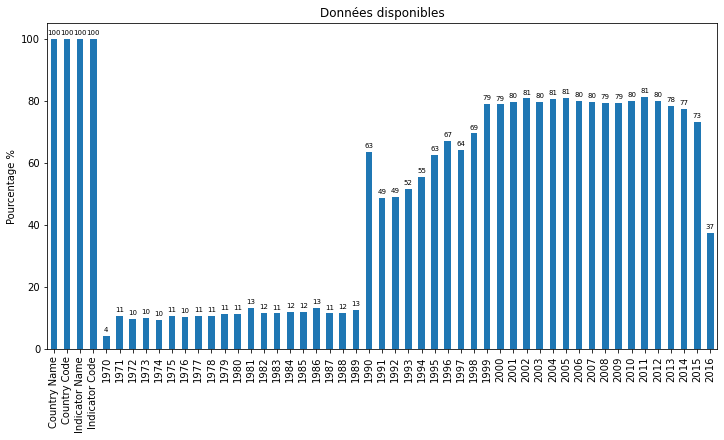

In [8]:
df_Country_glob = dataData.loc[(dataData['Country Name'].isin(list_Country))&(dataData['Indicator Code'].isin(Ind_list))]
df_Country_glob = columnsDataAvailable(df_Country_glob,0)

### We can't keep to old values. 2014 seems the best youngest year to study our indicators

### Now we can filter our countries by removing countries which have not the information for indicators in 2014

In [9]:
for a in Ind_list:
    df_a = df_Country_glob.loc[df_Country_glob['Indicator Code']== a]
    percAvailable = (((df_a['2014'].notna().sum())/df_a.shape[0])*100)
    print('For {} there is {} data available'.format(a,percAvailable))

For IT.NET.USER.P2 there is 94.35897435897435 data available
For NY.GDP.MKTP.PP.KD there is 87.17948717948718 data available
For SP.POP.1524.TO.UN there is 84.61538461538461 data available
For SE.SEC.ENRR.UP there is 63.07692307692307 data available
For SE.TER.ENRR there is 56.92307692307692 data available


### Removing countries which have not the informations that we need

In [10]:
list_Country_cl = list_Country
for ind in Ind_list:
    df_Ind = df_Country_glob.loc[(df_Country_glob['Country Name'].isin(list_Country_cl))&(df_Country_glob['Indicator Code'] == ind)&(df_Country_glob['2014'].notna())]
    list_Country_cl = df_Ind['Country Name'].unique()

print(list_Country_cl.shape)

(82,)


### Check if the cleaned countries list have all the informations that we need

In [11]:
df_Country_glob_cl = dataData.loc[dataData['Country Name'].isin(list_Country_cl)]
for b in Ind_list:
    df_a = df_Country_glob_cl.loc[df_Country_glob_cl['Indicator Code']== b]
    percAvailable = (((df_a['2014'].notna().sum())/df_a.shape[0])*100)
    print('For {} there is {} data available'.format(b,percAvailable))

For IT.NET.USER.P2 there is 100.0 data available
For NY.GDP.MKTP.PP.KD there is 100.0 data available
For SP.POP.1524.TO.UN there is 100.0 data available
For SE.SEC.ENRR.UP there is 100.0 data available
For SE.TER.ENRR there is 100.0 data available


## **Now we evaluate each indicator for the year 2014**
### **GDP (constant 2011 $)**

In [12]:
year = '2014'
df_Ind_GDP = df_Country_glob_cl.loc[df_Country_glob_cl['Indicator Code'] == Ind_GDP]
mean_IndGDP_2014 = df_Ind_GDP[year].mean()
med_IndGDP_2014 = df_Ind_GDP[year].median()
std_IndGDP_2014 = df_Ind_GDP[year].std()
print('classical statistics indicators in trillion, Mean:{}, Mediane:{}, Standard Deviation:{}'.format(mean_IndGDP_2014/1e12,med_IndGDP_2014/1e12,std_IndGDP_2014/1e12))


classical statistics indicators in trillion, Mean:1.016705879107858, Mediane:0.167604046328105, Standard Deviation:2.78154537583861


In [13]:
df_Ind_GDP_cl = df_Ind_GDP.loc[df_Ind_GDP[year]>med_IndGDP_2014]
df_GDP_Rank = df_Ind_GDP_cl.sort_values(by=year,ascending = False)
#setting index of the df as the country name
df_GDP_Rank.set_index('Country Name',inplace = True)

### Plot bar graph for 10 first Country + line graph in the ranking of GDP


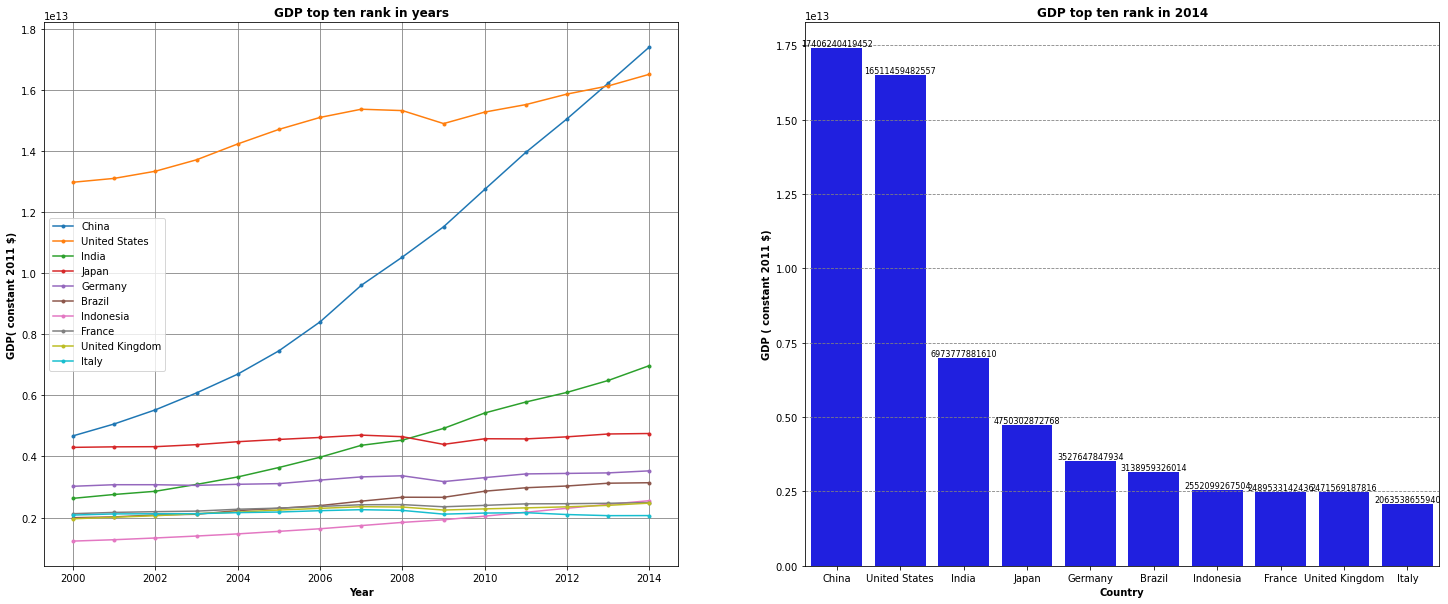

In [14]:
pos_2000 = df_GDP_Rank.columns.get_loc('2000')
pos_2014 = df_GDP_Rank.columns.get_loc('2014')
figure_GPD = plt.figure(figsize = (25,10))
# Line graph
figure_GPD.add_subplot(1,2,1)
plt.title('GDP top ten rank in years',fontdict = {'fontweight':'bold'})
sample = df_GDP_Rank.T.iloc[pos_2000:pos_2014+1,0:10]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Year',fontweight ='bold')
plt.ylabel('GDP( constant 2011 $)',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_GPD.add_subplot(1,2,2)
ax = sns.barplot(x = df_GDP_Rank.iloc[0:10,pos_2014].index,y = df_GDP_Rank.iloc[0:10,pos_2014] ,color ='b')
plt.title('GDP top ten rank in 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Country',fontweight ='bold')
plt.ylabel('GDP ( constant 2011 $)',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_GDP_Rank.iloc[0:10,pos_2014].index)),(df_GDP_Rank.iloc[0:10,pos_2014].values)):
            ax.text(x, y+1, '%.0f' % (y), ha='center', va= 'bottom',size = 8)

plt.show()



### Trying to plot more cleary for this indicator , China united States crush all other countries

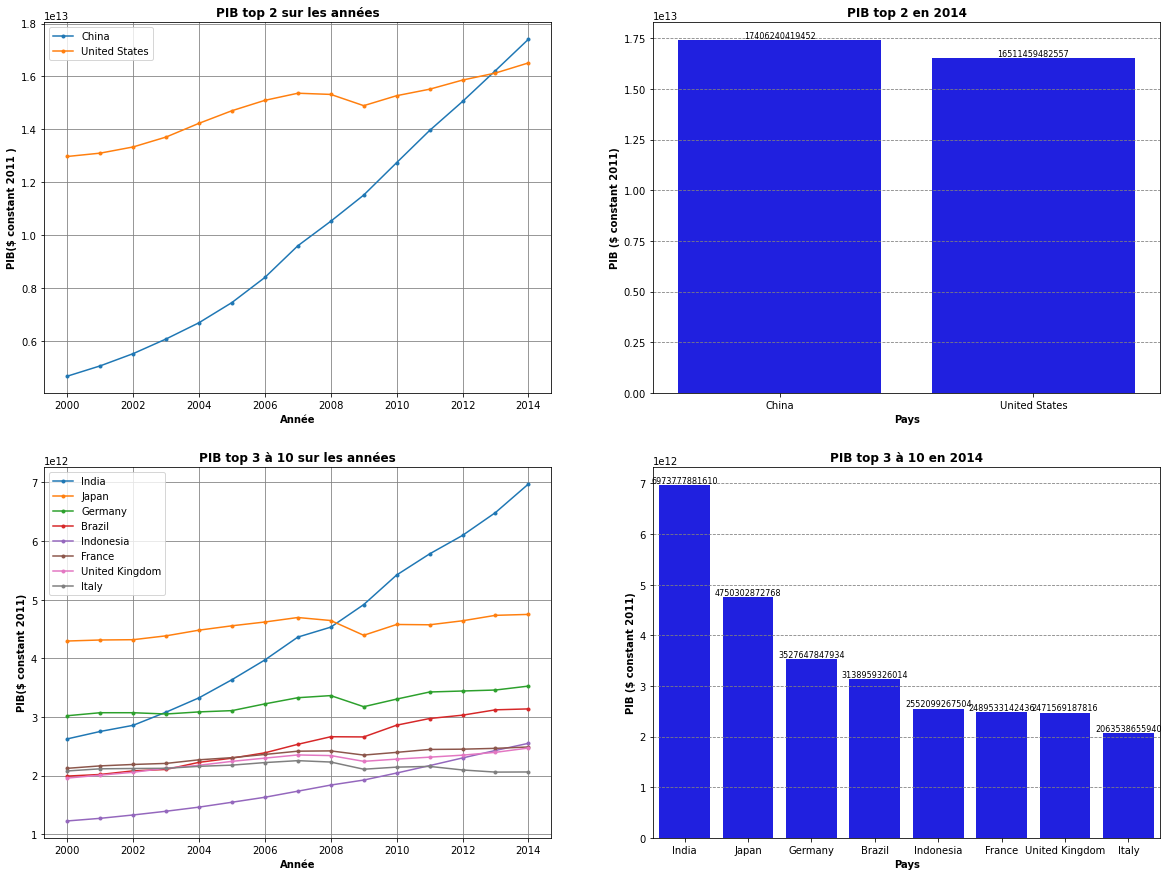

In [15]:
figure_GPD_2 = plt.figure(figsize = (20,15))
# Line graph
figure_GPD_2.add_subplot(2,2,1)
plt.title('PIB top 2 sur les années',fontdict = {'fontweight':'bold'})
sample = df_GDP_Rank.T.iloc[pos_2000:pos_2014+1,0:2]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('PIB($ constant 2011 )',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_GPD_2.add_subplot(2,2,2)
ax = sns.barplot(x = df_GDP_Rank.iloc[0:2,pos_2014].index,y = df_GDP_Rank.iloc[0:2,pos_2014] ,color ='b')
plt.title('PIB top 2 en 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('PIB ($ constant 2011)',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_GDP_Rank.iloc[0:2,pos_2014].index)),(df_GDP_Rank.iloc[0:2,pos_2014].values)):
            ax.text(x, y+1, '%.0f' % (y), ha='center', va= 'bottom',size = 8)
        
figure_GPD_2.add_subplot(2,2,3)
plt.title('PIB top 3 à 10 sur les années',fontdict = {'fontweight':'bold'})
sample = df_GDP_Rank.T.iloc[pos_2000:pos_2014+1,2:10]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('PIB($ constant 2011)',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_GPD_2.add_subplot(2,2,4)
ax = sns.barplot(x = df_GDP_Rank.iloc[2:10,pos_2014].index,y = df_GDP_Rank.iloc[2:10,pos_2014] ,color ='b')
plt.title('PIB top 3 à 10 en 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('PIB ($ constant 2011)',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_GDP_Rank.iloc[2:10,pos_2014].index)),(df_GDP_Rank.iloc[2:10,pos_2014].values)):
            ax.text(x, y+1, '%.0f' % (y), ha='center', va= 'bottom',size = 8)        
plt.show()

## **Internet per users (per 100 people)**

classical statistics indicators, Mean:55.217657117878055, Mediane:60.605000000000004, Standard Deviation:26.97360505761342


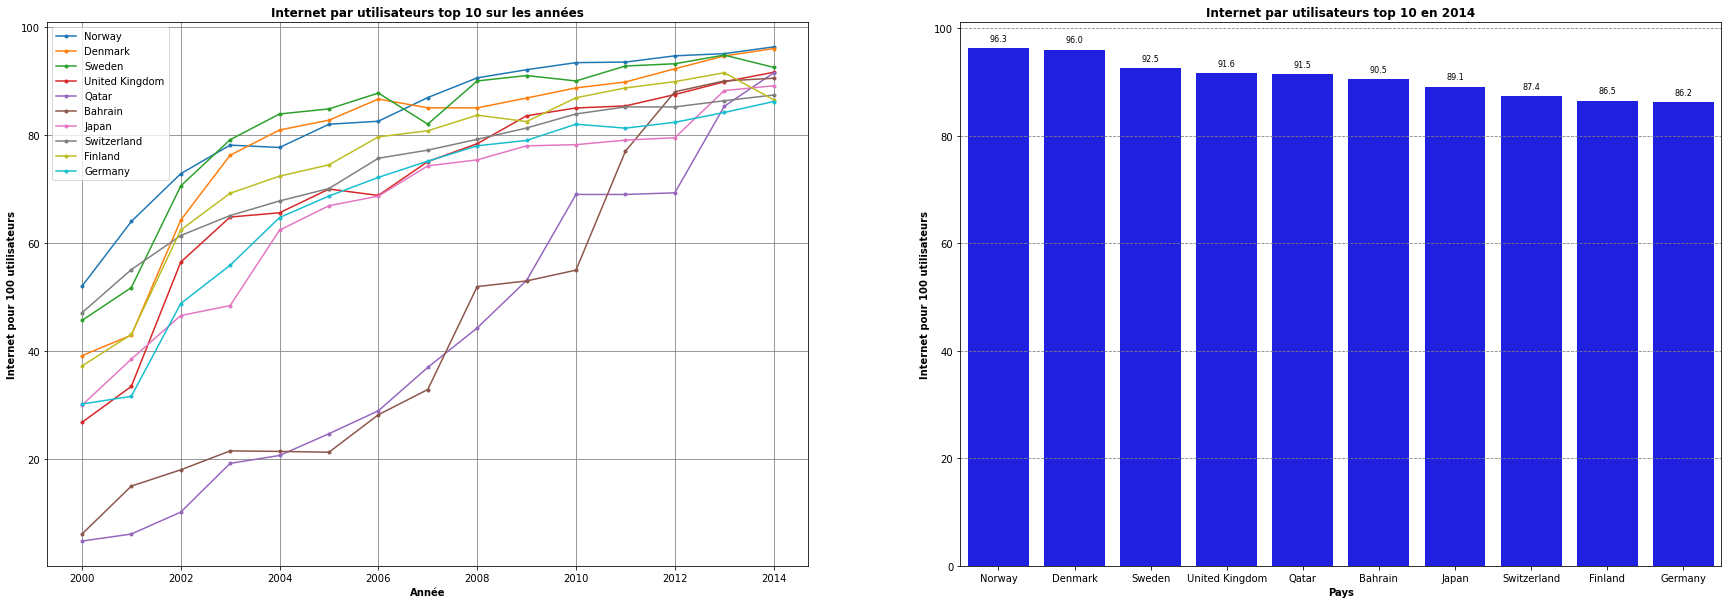

In [16]:
year = '2014'
df_Ind_Internet = df_Country_glob_cl.loc[df_Country_glob_cl['Indicator Code'] == Ind_internet]
mean_IndInt_2014 = df_Ind_Internet[year].mean()
med_IndInt_2014 = df_Ind_Internet[year].median()
std_IndInt_2014 = df_Ind_Internet[year].std()
print('classical statistics indicators, Mean:{}, Mediane:{}, Standard Deviation:{}'.format(mean_IndInt_2014,med_IndInt_2014,std_IndInt_2014))

df_Ind_Internet_cl = df_Ind_Internet.loc[df_Ind_Internet[year]>med_IndInt_2014]
df_Internet_Rank = df_Ind_Internet_cl.sort_values(by=year,ascending = False)
#setting index of the df as the country name
df_Internet_Rank.set_index('Country Name',inplace = True)

pos_2000 = df_Internet_Rank.columns.get_loc('2000')
pos_2014 = df_Internet_Rank.columns.get_loc('2014')
figure_Internet = plt.figure(figsize = (30,10))
# Line graph
figure_Internet.add_subplot(1,2,1)
plt.title('Internet par utilisateurs top 10 sur les années',fontdict = {'fontweight':'bold'})
sample = df_Internet_Rank.T.iloc[pos_2000:pos_2014+1,0:10]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('Internet pour 100 utilisateurs',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_Internet.add_subplot(1,2,2)
ax = sns.barplot(x = df_Internet_Rank.iloc[0:10,pos_2014].index,y = df_Internet_Rank.iloc[0:10,pos_2014] ,color ='b')
plt.title('Internet par utilisateurs top 10 en 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('Internet pour 100 utilisateurs',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_Internet_Rank.iloc[0:10,pos_2014].index)),(df_Internet_Rank.iloc[0:10,pos_2014].values)):
            ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 8)
#plt.savefig('Indicateur Internet 2014.png',dpi = 300)
plt.show()


## **Population 15-24 (number)**

classical statistics indicators, Mean:10024628.158536585, Mediane:1219496.5, Standard Deviation:35069498.475495905


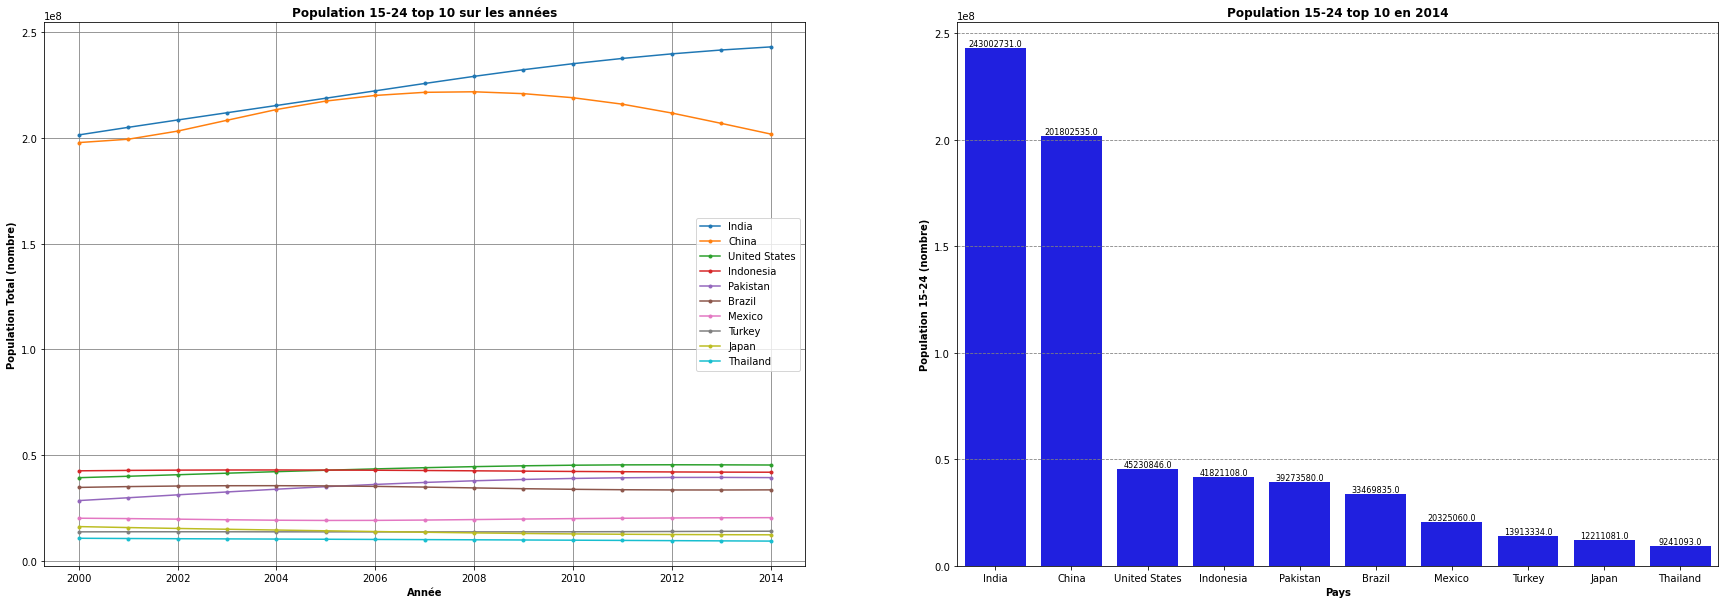

In [17]:
year = '2014'
df_Ind_pop1524 = df_Country_glob_cl.loc[df_Country_glob_cl['Indicator Code'] == Ind_pop1524]
mean_IndPop1524_2014 = df_Ind_pop1524[year].mean()
med_IndPop1524_2014 = df_Ind_pop1524[year].median()
std_IndPop1524_2014 = df_Ind_pop1524[year].std()
print('classical statistics indicators, Mean:{}, Mediane:{}, Standard Deviation:{}'.format(mean_IndPop1524_2014,med_IndPop1524_2014,std_IndPop1524_2014))

df_Ind_pop1524_cl = df_Ind_pop1524.loc[df_Ind_pop1524[year]>med_IndPop1524_2014]
df_Pop1524_Rank = df_Ind_pop1524_cl.sort_values(by=year,ascending = False)
#setting index of the df as the country name
df_Pop1524_Rank.set_index('Country Name',inplace = True)

pos_2000 = df_Pop1524_Rank.columns.get_loc('2000')
pos_2014 = df_Pop1524_Rank.columns.get_loc('2014')
figure_Pop1524 = plt.figure(figsize = (30,10))
# Line graph
figure_Pop1524.add_subplot(1,2,1)
plt.title('Population 15-24 top 10 sur les années',fontdict = {'fontweight':'bold'})
sample = df_Pop1524_Rank.T.iloc[pos_2000:pos_2014+1,0:10]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('Population Total (nombre)',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_Pop1524.add_subplot(1,2,2)
ax = sns.barplot(x = df_Pop1524_Rank.iloc[0:10,pos_2014].index,y = df_Pop1524_Rank.iloc[0:10,pos_2014] ,color ='b')
plt.title('Population 15-24 top 10 en 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('Population 15-24 (nombre)',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_Pop1524_Rank.iloc[0:10,pos_2014].index)),(df_Pop1524_Rank.iloc[0:10,pos_2014].values)):
            ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 8)
#plt.savefig('Indicateur Pop1524 2014.png',dpi = 300)
plt.show()

### Trying to plot more cleary for this indicator , India and China crush all other countries

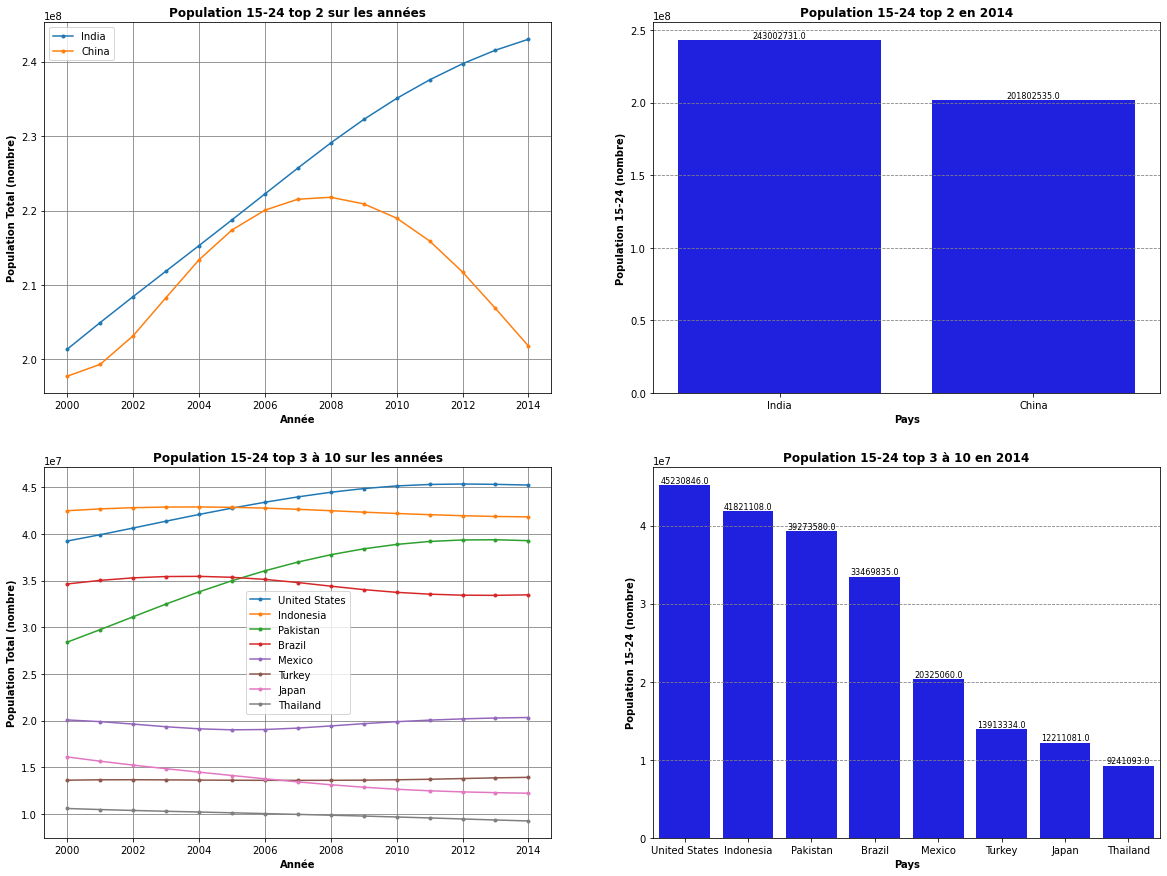

In [18]:
figure_Pop1524_2 = plt.figure(figsize = (20,15))
# Line graph
figure_Pop1524_2.add_subplot(2,2,3)
plt.title('Population 15-24 top 3 à 10 sur les années',fontdict = {'fontweight':'bold'})
sample = df_Pop1524_Rank.T.iloc[pos_2000:pos_2014+1,2:10]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('Population Total (nombre)',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_Pop1524_2.add_subplot(2,2,4)
ax = sns.barplot(x = df_Pop1524_Rank.iloc[2:10,pos_2014].index,y = df_Pop1524_Rank.iloc[2:10,pos_2014] ,color ='b')
plt.title('Population 15-24 top 3 à 10 en 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('Population 15-24 (nombre)',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_Pop1524_Rank.iloc[2:10,pos_2014].index)),(df_Pop1524_Rank.iloc[2:10,pos_2014].values)):
            ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 8)

figure_Pop1524_2.add_subplot(2,2,1)
plt.title('Population 15-24 top 2 sur les années',fontdict = {'fontweight':'bold'})
sample = df_Pop1524_Rank.T.iloc[pos_2000:pos_2014+1,0:2]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('Population Total (nombre)',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_Pop1524_2.add_subplot(2,2,2)
ax = sns.barplot(x = df_Pop1524_Rank.iloc[0:2,pos_2014].index,y = df_Pop1524_Rank.iloc[0:2,pos_2014] ,color ='b')
plt.title('Population 15-24 top 2 en 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('Population 15-24 (nombre)',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_Pop1524_Rank.iloc[0:2,pos_2014].index)),(df_Pop1524_Rank.iloc[0:2,pos_2014].values)):
            ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 8)
        
        
#plt.savefig('Indicateur Pop1524 2014.png',dpi = 300)        
plt.show()

## **Enrolment to enter  upper secondary education**

classical statistics indicators, Mean:91.3700108644439, Mediane:94.49986267089845, Standard Deviation:34.766589225878484


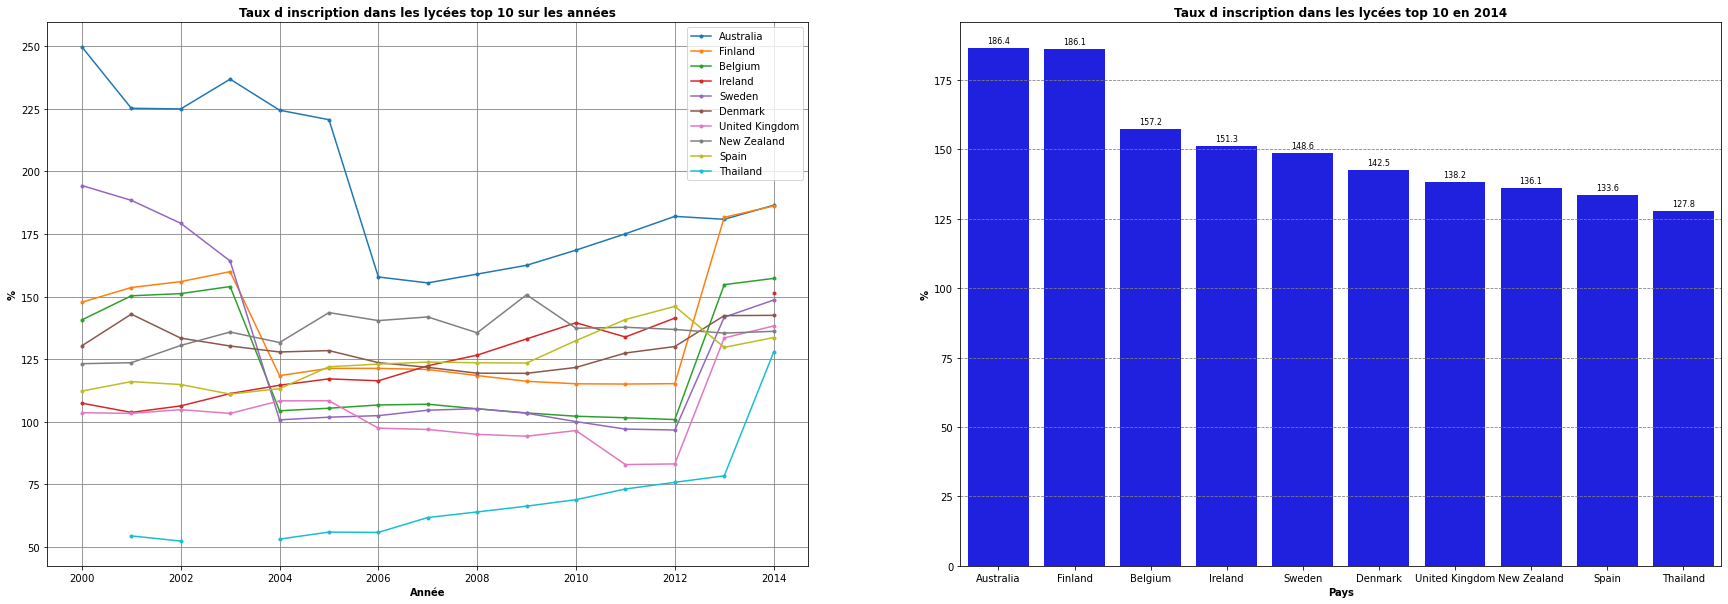

In [19]:
year = '2014'
df_Ind_enrlupper_secondary = df_Country_glob_cl.loc[df_Country_glob_cl['Indicator Code'] == Ind_enrlupper_secondary]
mean_Ind_enrlupper_secondary_2014 = df_Ind_enrlupper_secondary[year].mean()
med_Ind_enrlupper_secondary_2014 = df_Ind_enrlupper_secondary[year].median()
std_Ind_enrlupper_secondary_2014 = df_Ind_enrlupper_secondary[year].std()
print('classical statistics indicators, Mean:{}, Mediane:{}, Standard Deviation:{}'.format(mean_Ind_enrlupper_secondary_2014,med_Ind_enrlupper_secondary_2014,std_Ind_enrlupper_secondary_2014))

df_Ind_enrlupper_secondary_cl = df_Ind_enrlupper_secondary.loc[df_Ind_enrlupper_secondary[year]>med_Ind_enrlupper_secondary_2014]
df_Ind_enrlupper_secondary_Rank = df_Ind_enrlupper_secondary_cl.sort_values(by=year,ascending = False)
#setting index of the df as the country name
df_Ind_enrlupper_secondary_Rank.set_index('Country Name',inplace = True)
pos_2000 = df_Ind_enrlupper_secondary_Rank.columns.get_loc('2000')
pos_2014 = df_Ind_enrlupper_secondary_Rank.columns.get_loc('2014')
figure_Ind_enrlupper_secondary = plt.figure(figsize = (30,10))
# Line graph
figure_Ind_enrlupper_secondary.add_subplot(1,2,1)
plt.title('Taux d inscription dans les lycées top 10 sur les années',fontdict = {'fontweight':'bold'})
sample = df_Ind_enrlupper_secondary_Rank.T.iloc[pos_2000:pos_2014+1,0:10]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('%',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_Ind_enrlupper_secondary.add_subplot(1,2,2)
ax = sns.barplot(x = df_Ind_enrlupper_secondary_Rank.iloc[0:10,pos_2014].index,y = df_Ind_enrlupper_secondary_Rank.iloc[0:10,pos_2014] ,color ='b')
plt.title('Taux d inscription dans les lycées top 10 en 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('%',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_Ind_enrlupper_secondary_Rank.iloc[0:10,pos_2014].index)),(df_Ind_enrlupper_secondary_Rank.iloc[0:10,pos_2014].values)):
            ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 8)
#plt.savefig('Indicateur secondaire 2014.png',dpi = 300)
plt.show()


## **Enrolment to enter tertiary education**

classical statistics indicators, Mean:50.150807555128885, Mediane:53.148580551147504, Standard Deviation:26.902034274820906


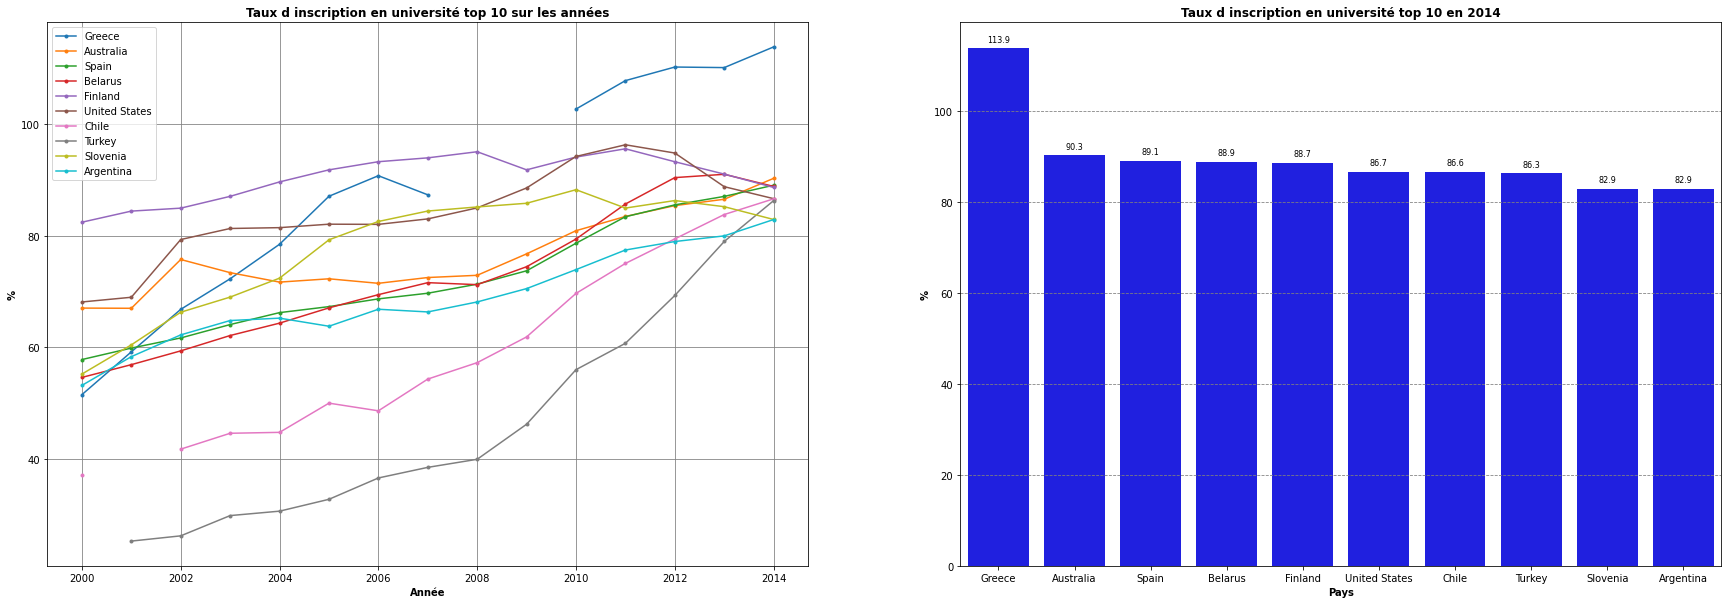

In [20]:
year = '2014'
df_Ind_enrl_tertiary = df_Country_glob_cl.loc[df_Country_glob_cl['Indicator Code'] == Ind_enrl_tertiary]
mean_Ind_enrl_tertiary_2014 = df_Ind_enrl_tertiary[year].mean()
med_Ind_enrl_tertiary_2014 = df_Ind_enrl_tertiary[year].median()
std_Ind_enrl_tertiary_2014 = df_Ind_enrl_tertiary[year].std()
print('classical statistics indicators, Mean:{}, Mediane:{}, Standard Deviation:{}'.format(mean_Ind_enrl_tertiary_2014,med_Ind_enrl_tertiary_2014,std_Ind_enrl_tertiary_2014))

df_Ind_enrl_tertiary_cl = df_Ind_enrl_tertiary.loc[df_Ind_enrl_tertiary[year]>med_Ind_enrl_tertiary_2014]
df_Ind_enrl_tertiary_Rank = df_Ind_enrl_tertiary_cl.sort_values(by=year,ascending = False)
#setting index of the df as the country name
df_Ind_enrl_tertiary_Rank.set_index('Country Name',inplace = True)

pos_2000 = df_Ind_enrl_tertiary_Rank.columns.get_loc('2000')
pos_2014 = df_Ind_enrl_tertiary_Rank.columns.get_loc('2014')
figure_Ind_enrl_tertiary = plt.figure(figsize = (30,10))
# Line graph
figure_Ind_enrl_tertiary.add_subplot(1,2,1)
plt.title('Taux d inscription en université top 10 sur les années',fontdict = {'fontweight':'bold'})
sample = df_Ind_enrl_tertiary_Rank.T.iloc[pos_2000:pos_2014+1,0:10]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('%',fontweight ='bold')
plt.legend(sample.columns)
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::2])
#bar graph
figure_Ind_enrl_tertiary.add_subplot(1,2,2)
ax = sns.barplot(x = df_Ind_enrl_tertiary_Rank.iloc[0:10,pos_2014].index,y = df_Ind_enrl_tertiary_Rank.iloc[0:10,pos_2014] ,color ='b')
plt.title('Taux d inscription en université top 10 en 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('%',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_Ind_enrl_tertiary_Rank.iloc[0:10,pos_2014].index)),(df_Ind_enrl_tertiary_Rank.iloc[0:10,pos_2014].values)):
            ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 8)
#plt.savefig('Indicateur tertiary.png',dpi = 300)
plt.show()

## **Normalization of the indicators to evaluate a global score**
### Create a dataframe with score for all countries in our list

In [21]:
list_df_Ind = [df_Ind_GDP,df_Ind_Internet,df_Ind_pop1524,df_Ind_enrlupper_secondary,df_Ind_enrl_tertiary]
df_score = pd.DataFrame([],index = list_Country_cl)
for dataf in list_df_Ind:
    name_indicator = dataf.iloc[0,2]
    loc_year = dataf.loc[:,year]
    scalerManu = (loc_year-(loc_year.min()))/((loc_year.max())-(loc_year.min()))
    df_score[name_indicator] = scalerManu.values

# we sum all the normalize indicators for the final score and sort the values 
df_score[f'Score (on 5) year {year}'] = df_score.sum(axis=1)
df_score_rank = df_score.sort_values(f'Score (on 5) year {year}', ascending = False)
df_score_rank.head(20)

,"GDP, PPP (constant 2011 international $)",Internet users (per 100 people),"Population, ages 15-24, total","Gross enrolment ratio, upper secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Score (on 5) year 2014
United States,0.948591,0.754530,0.186031,0.439746,0.750607,3.079505
China,1.000000,0.490097,0.830433,0.412862,0.317287,3.050679
Australia,0.058431,0.870417,0.011902,1.000000,0.783995,2.724746
Finland,0.012181,0.897075,0.002531,0.998103,0.769009,2.678899
Denmark,0.014547,0.996734,0.002785,0.735689,0.703424,2.453179
Belgium,0.026589,0.880952,0.005014,0.824376,0.628282,2.365213
Spain,0.083246,0.788137,0.017622,0.682347,0.772681,2.344032
Norway,0.018656,1.000000,0.002536,0.631860,0.660037,2.313089
United Kingdom,0.141940,0.950590,0.032028,0.710120,0.473905,2.308582
Ireland,0.013023,0.825011,0.002259,0.788881,0.667772,2.296946


### We plot a score chart

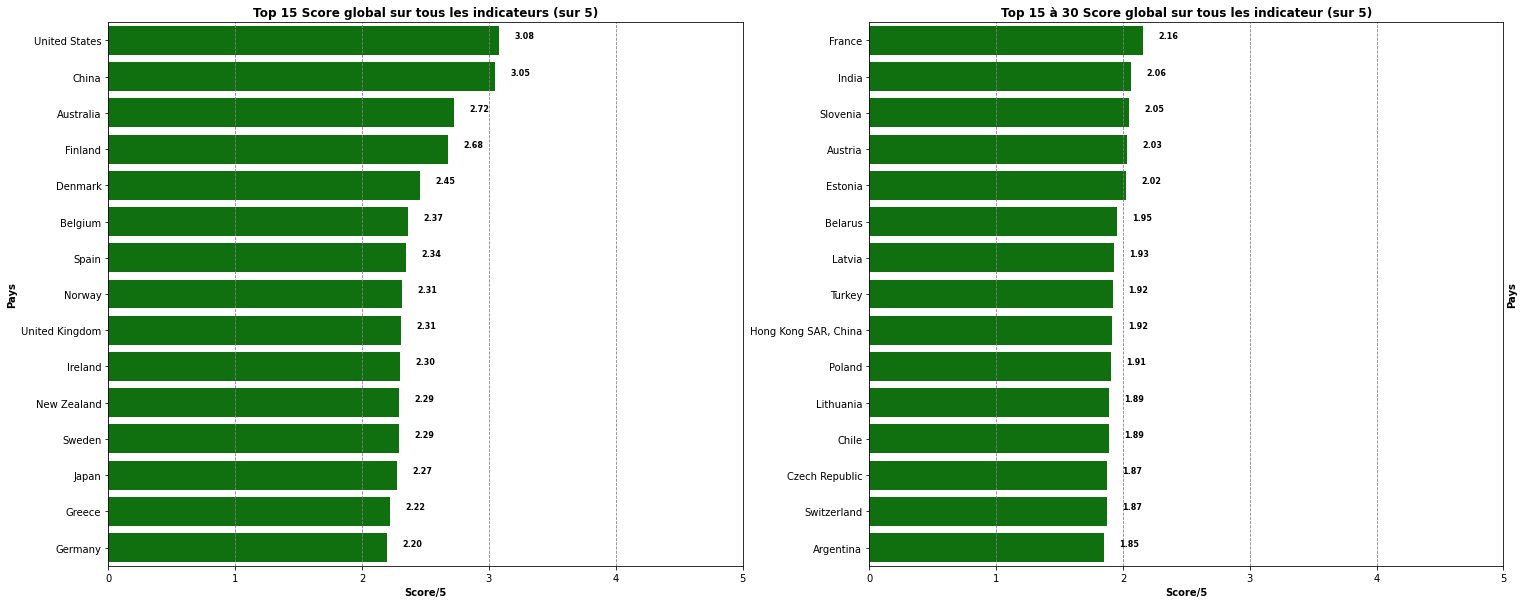

In [22]:
# trying to plot a barplot with seaborn horizontal with the mean of each students
figure_score = plt.figure(figsize = (25,10))

figure_score.add_subplot(1,2,1)
ax = sns.barplot(y = df_score_rank.iloc[0:15,5].index,x = df_score_rank.iloc[0:15,5].values,orient = 'h',color ='g')
plt.title('Top 15 Score global sur tous les indicateurs (sur 5)',fontdict = {'fontweight':'bold'})
plt.xlabel('Score/5',fontweight ='bold')
plt.ylabel('Pays',fontweight ='bold')
plt.grid(axis = 'x',color='gray',linestyle = 'dashed')
plt.xticks(range(0,6,1))
# Loop to show labels above the bars
for y,x in zip(range(0,len(df_score_rank.iloc[0:15,5].index)),df_score_rank.iloc[0:15,5].values):
    ax.text(x+0.2,y,'%.2f' % (x), ha='center', va= 'bottom',size = 8,fontweight ='bold')

figure_score.add_subplot(1,2,2)  

ax2 = sns.barplot(y = df_score_rank.iloc[15:30,5].index,x = df_score_rank.iloc[15:30,5].values,orient = 'h',color ='g')
plt.title('Top 15 à 30 Score global sur tous les indicateur (sur 5)',fontdict = {'fontweight':'bold'})
plt.xlabel('Score/5',fontweight ='bold')
plt.ylabel('Pays',fontweight ='bold')
plt.grid(axis = 'x',color='gray',linestyle = 'dashed')
plt.xticks(range(0,6,1))
ax2.yaxis.set_label_position("right")
# Loop to show labels above the bars
for y,x in zip(range(0,len(df_score_rank.iloc[15:30,5].index)),df_score_rank.iloc[15:30,5].values):
    ax2.text(x+0.2,y,'%.2f' % (x), ha='center', va= 'bottom',size = 8,fontweight ='bold') 
#plt.savefig('Score 2014.png',dpi = 300)
plt.show()



## **Evaluating the growth rate to see the potential evolution of Country years [2000 - 2014]**

In [23]:
df_growth_rate = df_Ind_GDP.set_index('Country Name')
pos_2000 = df_growth_rate.columns.get_loc('2000')
pos_2014 = df_growth_rate.columns.get_loc('2014')
df_growth_rate = (df_growth_rate.iloc[:,pos_2000:pos_2014+1].pct_change(axis = 1))*100


columns with first values is 2001 and columns with last value is 2014
There is 99.82578397212544 percent of values available in the Dataframe, available data above 0 percent have been kept


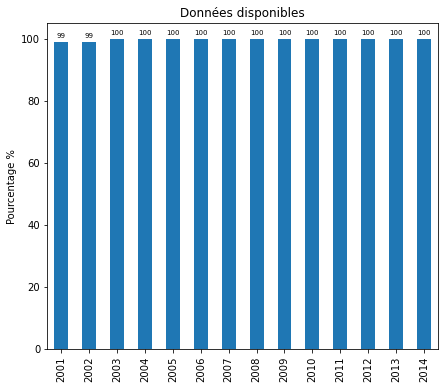

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Name,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,8.444163,1.055556,11.175270,5.554138,13.740205,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531
Albania,7.940331,4.231371,5.773491,5.709557,5.720820,5.431013,5.900000,3.760854,3.352610,3.710058,2.550161,1.419968,1.000755,1.774369
Argentina,-4.408840,-10.894485,8.837041,9.029573,8.851660,8.047152,9.007651,4.057233,-5.918525,10.125398,6.003952,-1.026420,2.405324,-2.512615
Armenia,9.556642,13.186301,14.040795,10.467842,13.865711,13.198004,13.749202,6.900000,-14.149989,2.200000,4.700000,7.200000,3.300000,3.600000
Australia,1.930054,3.852927,3.068305,4.145671,3.203548,2.978054,3.749727,3.698141,1.811957,2.005880,2.372821,3.634250,2.569856,2.609457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,9.200000,5.200000,9.400000,12.100000,2.700000,7.300000,7.900001,2.300000,-14.800000,4.200000,5.465532,0.238681,-0.026730,-6.552619
United Kingdom,2.544131,2.457878,3.325909,2.364455,3.096089,2.456000,2.356708,-0.472540,-4.187759,1.694547,1.452624,1.481330,2.052389,3.054251
United States,0.975982,1.786128,2.806776,3.785743,3.345216,2.666626,1.778570,-0.291621,-2.775530,2.531921,1.601455,2.224031,1.677332,2.370458


In [24]:
columnsDataAvailable(df_growth_rate,0)

### We are taking values between 2003 and 2014
### And we add the sum of growth rate in this period in the dataFrame Score

In [25]:
df_growth_rate['Sum Growth Rate 2003-14'] = df_growth_rate.loc[:,'2003':'2014'].sum(axis = 1)
df_score['Sum growth Rate 2003-14'] = df_growth_rate['Sum Growth Rate 2003-14']
df_score

,"GDP, PPP (constant 2011 international $)",Internet users (per 100 people),"Population, ages 15-24, total","Gross enrolment ratio, upper secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Score (on 5) year 2014,Sum growth Rate 2003-14
Afghanistan,0.003288,0.059208,0.028817,0.142714,0.035631,0.269658,96.854720
Albania,0.001714,0.618626,0.002219,0.443600,0.531011,1.597170,46.103653
Argentina,0.046358,0.667088,0.028249,0.391300,0.716265,1.849260,56.907422
Armenia,0.001268,0.560923,0.001827,0.408835,0.361874,1.334728,79.071565
Australia,0.058431,0.870417,0.011902,1.000000,0.783995,2.724746,35.847668
...,...,...,...,...,...,...,...
Ukraine,0.020304,0.472566,0.020936,0.435912,0.710652,1.660370,30.224865
United Kingdom,0.141940,0.950590,0.032028,0.710120,0.473905,2.308582,18.674002
United States,0.948591,0.754530,0.186031,0.439746,0.750607,3.079505,21.720975
Uruguay,0.003833,0.632954,0.002017,0.365278,0.472688,1.476770,59.709355


### **We evaluate the  potential futur of countries with growth rate and score filtering**


### We calculate the standard statistics indicator to filter our scores

In [26]:
list_to_calculate = ['Score (on 5) year 2014','Sum growth Rate 2003-14']
for calc in list_to_calculate:
    mean = df_score[calc].mean()
    med = df_score[calc].median()
    std = df_score[calc].std()
    print(f'For the {calc} the mean is {mean} the median is {med} and the standard deviation is {std}')


For the Score (on 5) year 2014 the mean is 1.5108112721254976 the median is 1.6658620011348613 and the standard deviation is 0.7265567980685075
For the Sum growth Rate 2003-14 the mean is 48.41886800351769 the median is 46.743459392182494 and the standard deviation is 31.178537732167264


### Filtering with score + Sum Growth Rate

In [27]:
df_score_grwth = df_score.loc[(df_score['Score (on 5) year 2014']> 1.6)&(df_score['Sum growth Rate 2003-14']>46)]
df_score_grwth_rank = df_score_grwth.sort_values(['Sum growth Rate 2003-14'], ascending = False)

### Define a new DataFrame for the countries with potential regarding there growth rate on the passed years

In [28]:
list_country_grwth = df_score_grwth_rank.index
df_growth_rate_cl = df_growth_rate.loc[df_growth_rate.index.isin(list_country_grwth)]
df_growth_rate_cl

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Sum Growth Rate 2003-14
Country Name,,,,,,,,,,,,,,,,
Argentina,NaN,-4.408840,-10.894485,8.837041,9.029573,8.851660,8.047152,9.007651,4.057233,-5.918525,10.125398,6.003952,-1.026420,2.405324,-2.512615,56.907422
Bahrain,NaN,2.491034,3.614148,6.023951,6.980947,6.768940,6.468568,8.292444,6.245128,2.539772,4.334407,1.983823,3.732252,5.416504,4.349842,63.136578
Belarus,NaN,4.725306,5.045267,7.043193,11.449743,9.400000,10.000000,8.600000,10.200003,0.199995,7.793698,5.543711,1.731393,1.023985,1.723086,74.708806
Chile,NaN,3.303047,3.106971,4.091048,7.209540,5.742830,6.317176,4.905325,3.529531,-1.564239,5.844177,6.110919,5.318628,4.045004,1.909693,53.459632
China,NaN,8.339911,9.130646,10.035603,10.111223,11.395776,12.719479,14.231388,9.654289,9.399813,10.636140,9.536443,7.856262,7.757635,7.297666,120.631719
"Hong Kong SAR, China",NaN,0.560826,1.656730,3.056367,8.700101,7.388149,7.032667,6.464825,2.127933,-2.459090,6.767648,4.814658,1.700297,3.101567,2.762408,51.457529
India,NaN,4.823966,3.803975,7.860381,7.922943,9.284825,9.263965,9.801360,3.890957,8.479784,10.259963,6.638364,5.456388,6.386106,7.505220,92.750257
Lithuania,NaN,6.524431,6.760750,10.538565,6.550083,7.727408,7.406444,11.086954,2.628078,-14.814163,1.639820,6.049353,3.834902,3.506826,3.495016,49.649286
"Macao SAR, China",NaN,2.888692,8.946840,11.653359,26.755533,8.059728,13.314371,14.447450,3.393478,1.321261,25.263774,21.672659,9.237337,11.200067,-1.201149,145.117867


### We plot graphs with countries which may have a good developpement and a score above the mediane

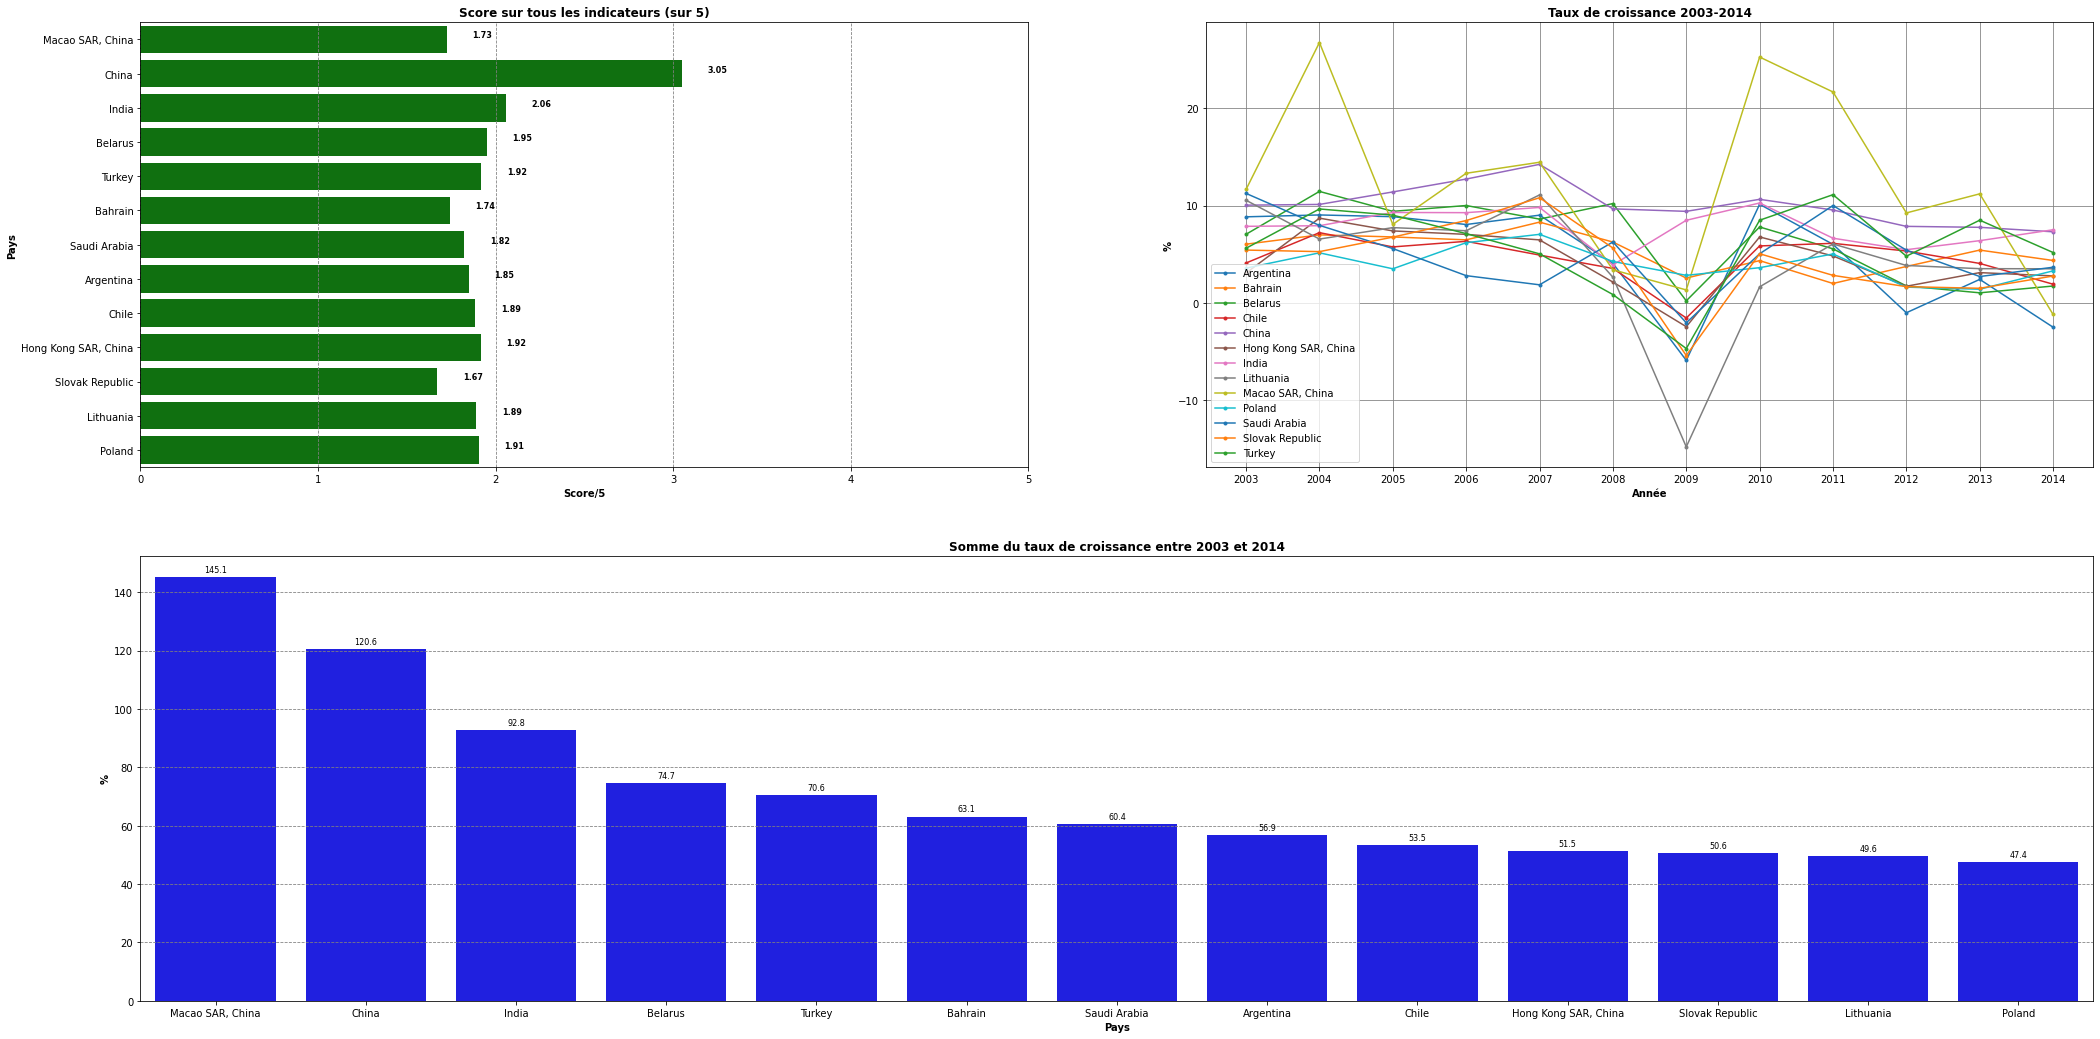

In [29]:
pos_2003 = df_growth_rate_cl.columns.get_loc('2003')
pos_2014 = df_growth_rate_cl.columns.get_loc('2014')

figure_score_growth_rank = plt.figure(figsize = (35,18))
# score graph
figure_score_growth_rank.add_subplot(2,2,1)
ax = sns.barplot(y = df_score_grwth_rank.iloc[:,5].index,x = df_score_grwth_rank.iloc[:,5].values,orient = 'h',color ='g')
plt.title('Score sur tous les indicateurs (sur 5)',fontdict = {'fontweight':'bold'})
plt.xlabel('Score/5',fontweight ='bold')
plt.ylabel('Pays',fontweight ='bold')
plt.grid(axis = 'x',color='gray',linestyle = 'dashed')
plt.xticks(range(0,6,1))
for y,x in zip(range(0,len(df_score_grwth_rank.iloc[:,5].index)),df_score_grwth_rank.iloc[:,5].values):
    ax.text(x+0.2,y,'%.2f' % (x), ha='center', va= 'bottom',size = 8,fontweight ='bold')

# bar graph    
figure_score_growth_rank.add_subplot(2,2,(3,4))
ax = sns.barplot(x = df_score_grwth_rank.iloc[:,6].index,y = df_score_grwth_rank.iloc[:,6].values ,color ='b')
plt.title('Somme du taux de croissance entre 2003 et 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('%',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_score_grwth_rank.iloc[:,6].index)),(df_score_grwth_rank.iloc[:,6].values)):
            ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 8)

#line graph year 2003 to 2014
figure_score_growth_rank.add_subplot(2,2,2)
plt.title('Taux de croissance 2003-2014',fontdict = {'fontweight':'bold'})
sample = df_growth_rate_cl.T.iloc[pos_2003:pos_2014+1,:]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')

plt.xlabel('Année',fontweight ='bold')
plt.ylabel('%',fontweight ='bold')
plt.legend(sample.columns, loc = 'lower left')
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::1])
#plt.savefig('Taux de croissance 2014.png',dpi = 300)
plt.show()


### plot only the ranking in growth rate sum

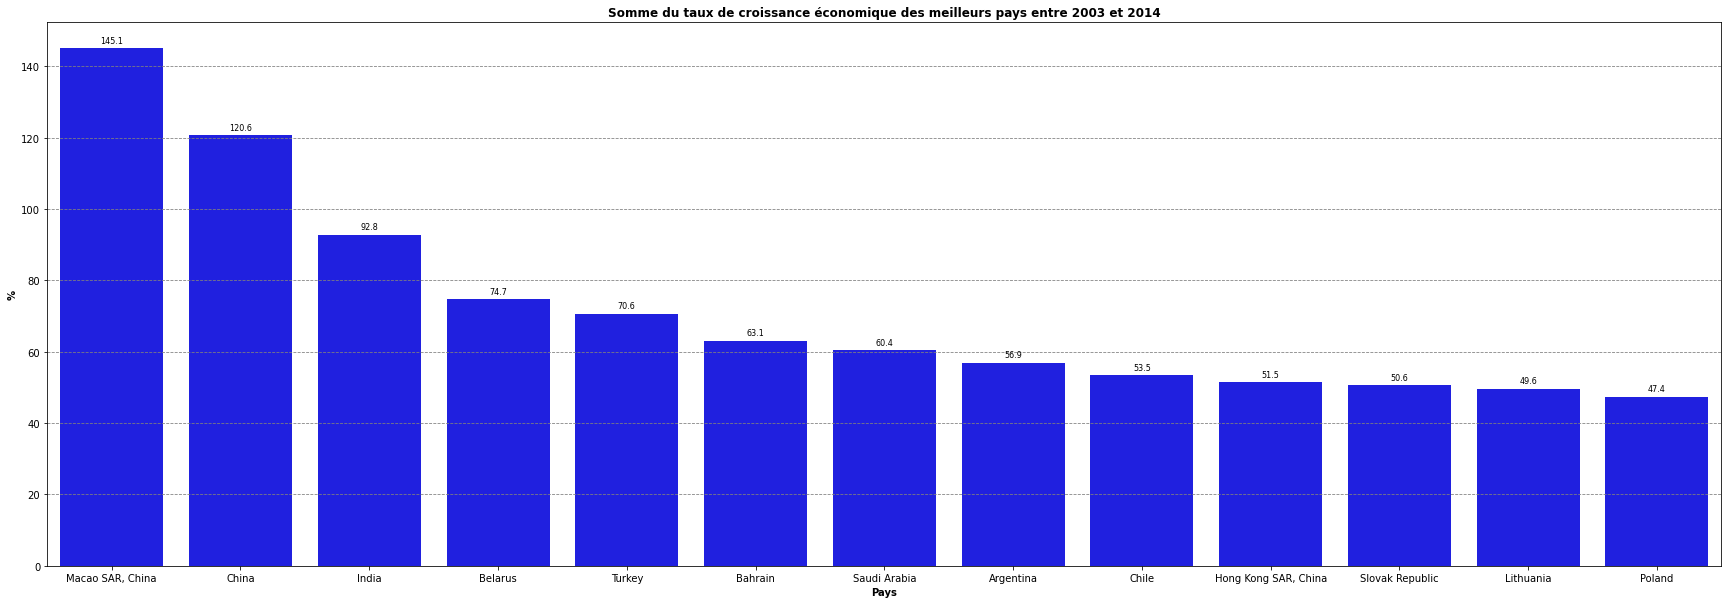

In [41]:
figure_score_growth_rank_alone = plt.figure(figsize = (30,10))
ax = sns.barplot(x = df_score_grwth_rank.iloc[:,6].index,y = df_score_grwth_rank.iloc[:,6].values ,color ='b')
plt.title('Somme du taux de croissance économique des meilleurs pays entre 2003 et 2014',fontdict = {'fontweight':'bold'})
plt.xlabel('Pays',fontweight ='bold')
plt.ylabel('%',fontweight ='bold')
plt.grid(axis = 'y',color='gray',linestyle = 'dashed')
for x,y in zip(range(0,len(df_score_grwth_rank.iloc[:,6].index)),(df_score_grwth_rank.iloc[:,6].values)):
            ax.text(x, y+1, '%.1f' % (y), ha='center', va= 'bottom',size = 8)
#plt.savefig('Somme taux de croissance 2003 2014.png',dpi = 300)
plt.show()


### plot score and growth rate evolution

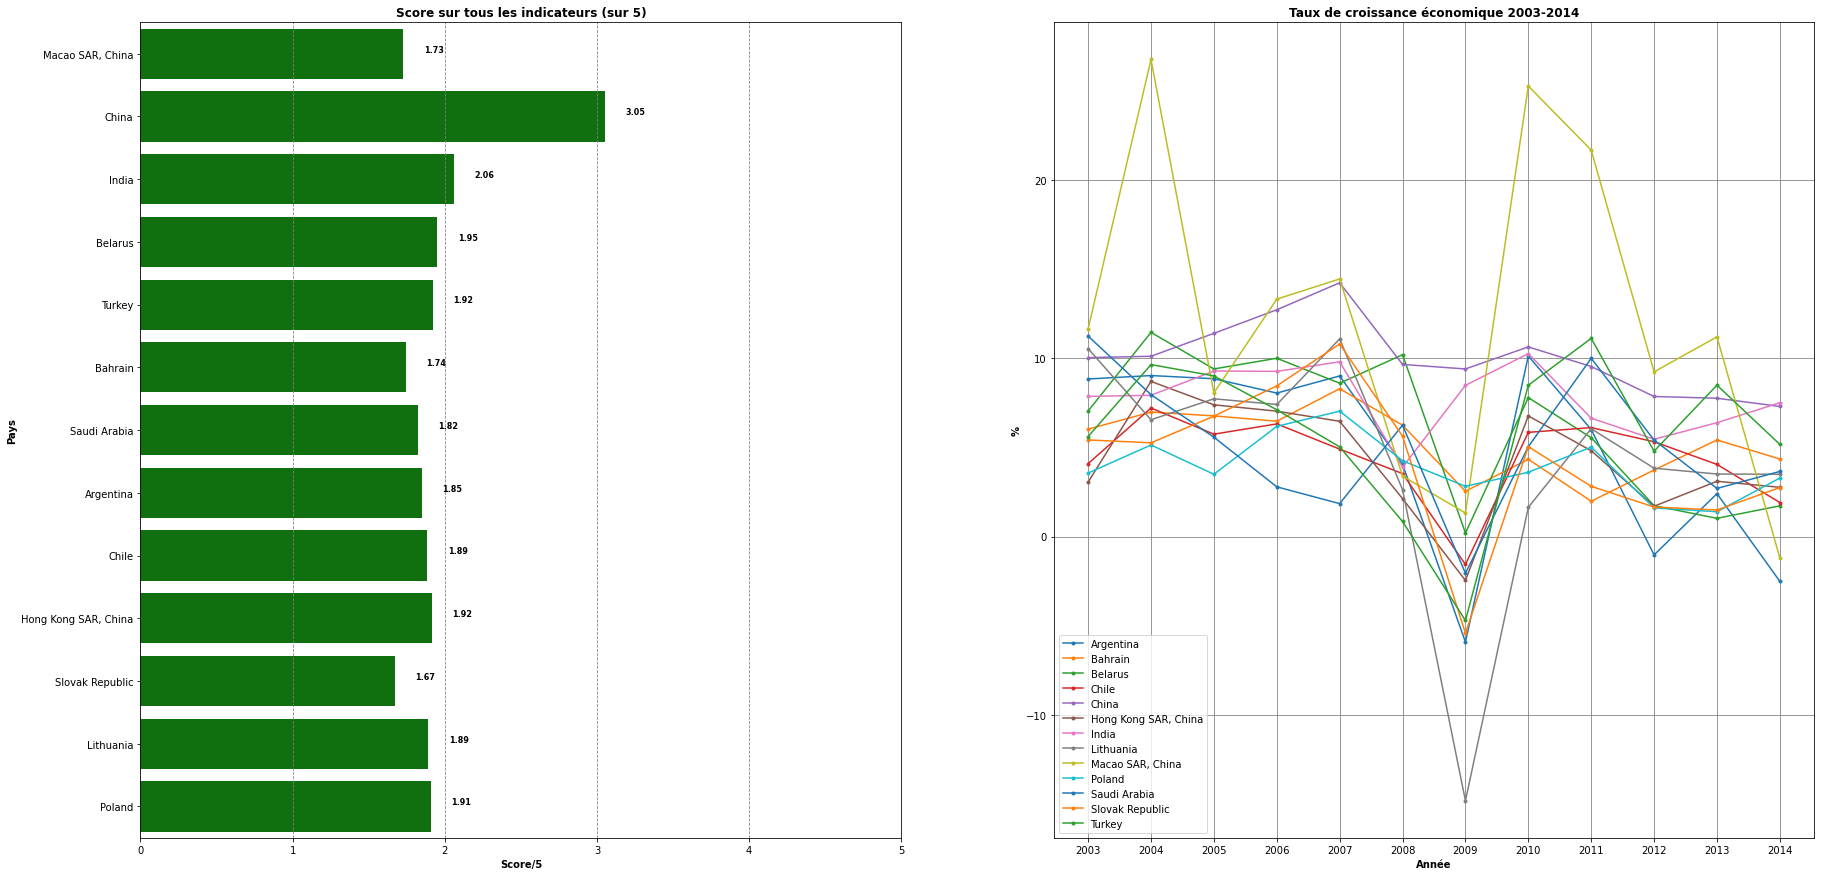

In [43]:
figure_score_growth_rank_2 = plt.figure(figsize = (30,15))
# score graph
figure_score_growth_rank_2.add_subplot(1,2,1)
ax = sns.barplot(y = df_score_grwth_rank.iloc[:,5].index,x = df_score_grwth_rank.iloc[:,5].values,orient = 'h',color ='g')
plt.title('Score sur tous les indicateurs (sur 5)',fontdict = {'fontweight':'bold'})
plt.xlabel('Score/5',fontweight ='bold')
plt.ylabel('Pays',fontweight ='bold')
plt.grid(axis = 'x',color='gray',linestyle = 'dashed')
plt.xticks(range(0,6,1))
for y,x in zip(range(0,len(df_score_grwth_rank.iloc[:,5].index)),df_score_grwth_rank.iloc[:,5].values):
    ax.text(x+0.2,y,'%.2f' % (x), ha='center', va= 'bottom',size = 8,fontweight ='bold')
#line graph year 2003 to 2014
figure_score_growth_rank_2.add_subplot(1,2,2)
plt.title('Taux de croissance économique 2003-2014',fontdict = {'fontweight':'bold'})
sample = df_growth_rate_cl.T.iloc[pos_2003:pos_2014+1,:]
for country in sample:
    plt.plot(sample.index,sample[country],marker = '.')
plt.xlabel('Année',fontweight ='bold')
plt.ylabel('%',fontweight ='bold')
plt.legend(sample.columns, loc = 'lower left')
plt.grid(color='gray', linestyle='solid')
plt.xticks(sample.index[::1])
#plt.savefig('Score et taux de croissance.png',dpi = 300)
plt.show()


### **Filtering countries by region to add pie chart of potential client countries in score by region in 2014**

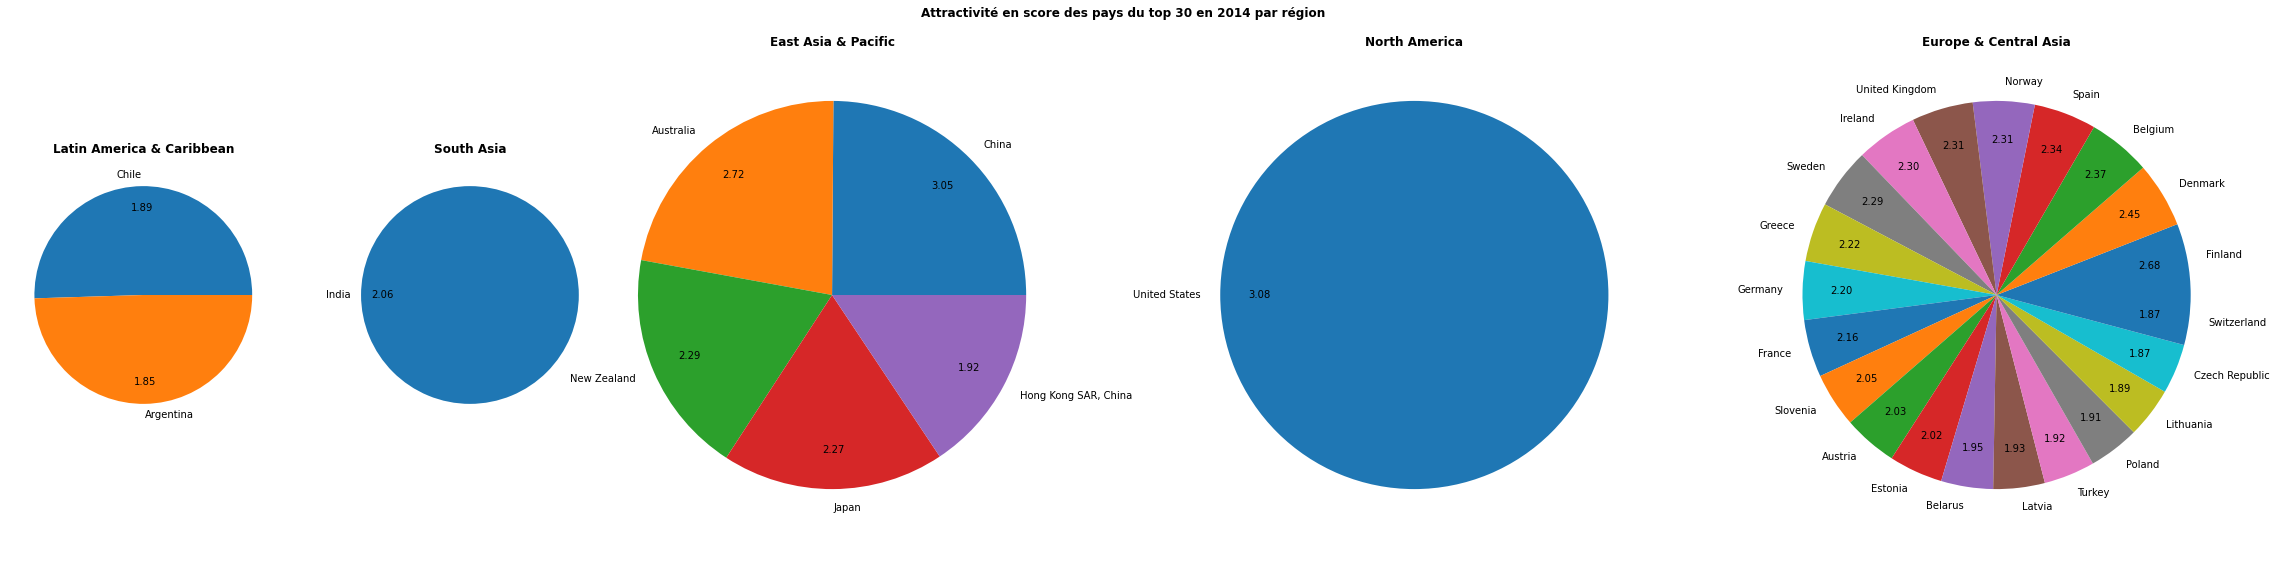

In [75]:
df_score_rank_30 = df_score_rank.iloc[0:30,:]
figure_region_rank30 = plt.figure(figsize = (40,10))
plt.title('Attractivité en score des pays du top 30 en 2014 par région',fontdict = {'fontweight':'bold'})
plt.axis('off')
number = len(dico_RegionCountry.keys())
count =1
for key in dico_RegionCountry.keys():
    df_reg_filtered = df_score_rank_30.loc[df_score_rank_30.index.isin(dico_RegionCountry[key])]
    n = df_reg_filtered.loc[:,'Score (on 5) year 2014'].sum()
    if n != 0 and df_reg_filtered.shape[0] <10:
        # Calculate a ration for each country
        x = df_reg_filtered.loc[:,'Score (on 5) year 2014']
        x_inv = df_reg_filtered['Score (on 5) year 2014'].sum()/100
        figure_region_rank30.add_subplot(1,number,count)
        lbls = df_reg_filtered.index
        plt.title(f'{key}',fontdict = {'fontweight':'bold'})
        plt.pie(x,labels = lbls,autopct = lambda x:f'{x*x_inv:.2f}' , pctdistance = 0.8)
        count+=1
    elif n != 0 and df_reg_filtered.shape[0] >10:
        name = key
        count -=1
        number -=1
    else:
        number -=1
df_reg_filtered = df_score_rank_30.loc[df_score_rank_30.index.isin(dico_RegionCountry[name])]
x = df_reg_filtered.loc[:,'Score (on 5) year 2014']
x_inv = df_reg_filtered['Score (on 5) year 2014'].sum()/100
figure_region_rank30.add_subplot(1,number,count)
lbls = df_reg_filtered.index
plt.title(f'{name}',fontdict = {'fontweight':'bold'})
plt.pie(x,labels = lbls,autopct = lambda x:f'{x*x_inv:.2f}',pctdistance = 0.8)
#plt.savefig('Actractivité par region 2014',dpi =300)
plt.show()

### **Filtering countries by region to add pie chart of the potential futur client by growth rate**

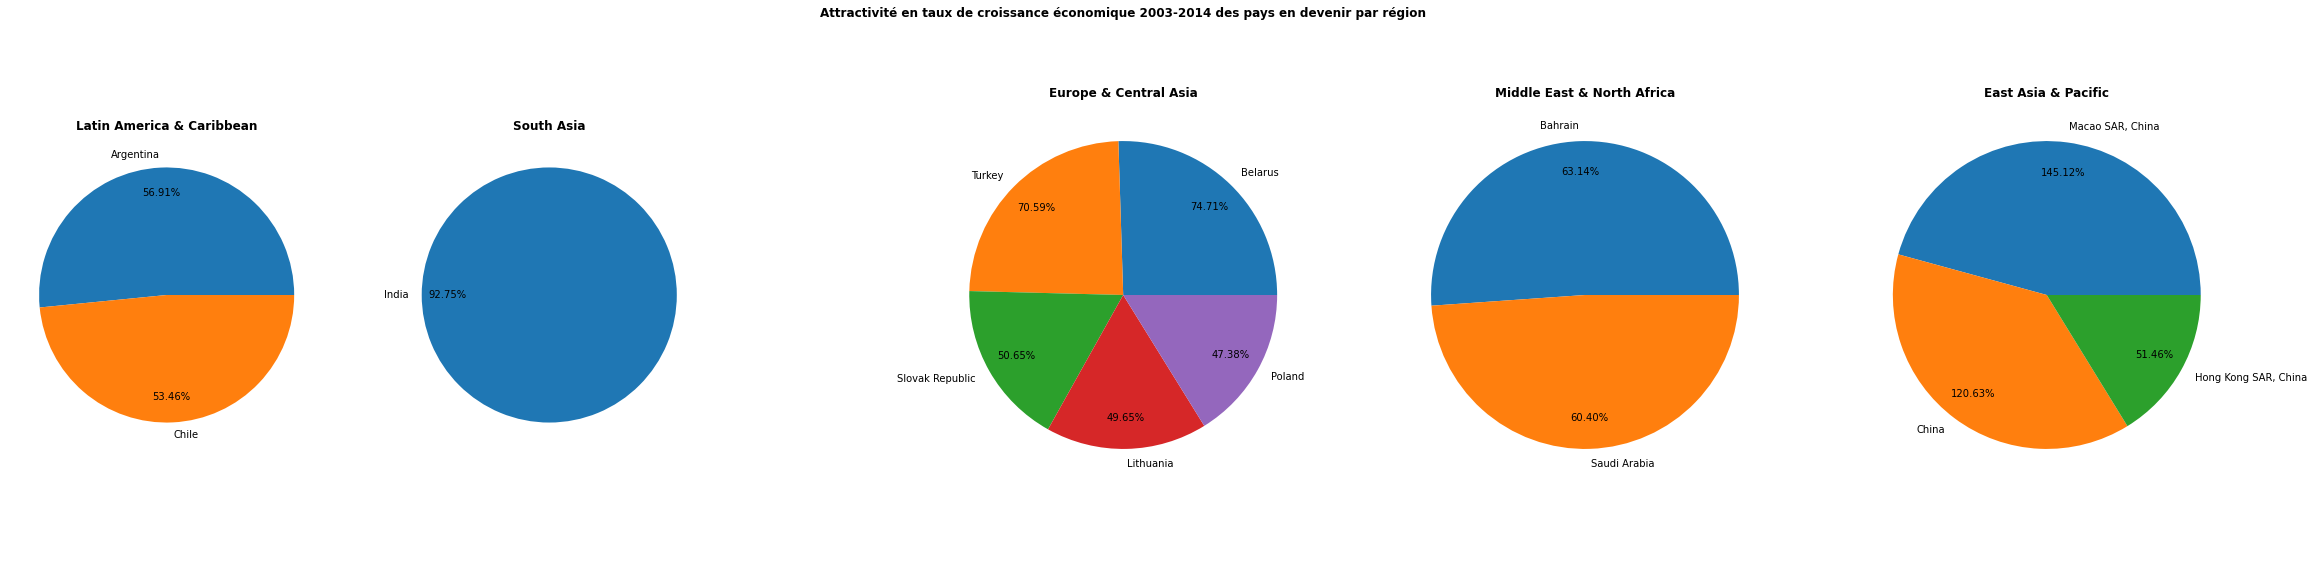

In [99]:
figure_region_growth = plt.figure(figsize = (40,10))
plt.title('Attractivité en taux de croissance économique 2003-2014 des pays en devenir par région',fontdict = {'fontweight':'bold'})
plt.axis('off')
number2 = len(dico_RegionCountry.keys())
count =1
for key in dico_RegionCountry.keys():
    df_reg_filtered = df_score_grwth_rank.loc[df_score_grwth_rank.index.isin(dico_RegionCountry[key])]
    n = df_reg_filtered.loc[:,'Sum growth Rate 2003-14'].sum()
    if n != 0:
        # Calculate a ration for each country
        x = df_reg_filtered.loc[:,'Sum growth Rate 2003-14']
        x_inv = df_reg_filtered['Sum growth Rate 2003-14'].sum()/100
        x_rank = df_reg_filtered['Score (on 5) year 2014'].values
        figure_region_growth.add_subplot(1,number2-1,count)
        lbls = df_reg_filtered.index
        plt.title(f'{key}',fontdict = {'fontweight':'bold'})
        plt.pie(x,labels = lbls,autopct =lambda x:f'{x*x_inv:.2f}'+'%',pctdistance = 0.8)
        plt.savefig('Attractivité pays en devenir.png',dpi = 300)
        count+=1
    else:
        number2 -=1
        
    
